In [6]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np
import pandas as pd
import sklearn
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
import scipy as sp
from io import StringIO

In [7]:
data = pd.read_csv('tornadoes-multiclass.csv')

In [8]:
X = preprocessing.scale(data.drop(['multiclass_casualties'],axis = 1))

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


In [9]:
Y = data['multiclass_casualties']

In [10]:
# apply SMOTE only to training set, test set does not have to be balanced
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
sm = SMOTE(sampling_strategy='not majority')

In [11]:
x_train_balanced, y_train_balanced = sm.fit_resample(x_train, y_train)

In [12]:
# Simple Logistic Regression

lr = LogisticRegression().fit(x_train_balanced, y_train_balanced)
lr_pred = lr.predict(x_test)
#lr_pred_prob = lr.predict_proba(x_test)[:,1]
#lr_pred_prob

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [13]:
accuracy_score(y_test,lr_pred)

0.8466006149641271

In [19]:
array = confusion_matrix(y_test, lr_pred)

In [17]:
array

array([[2392,  248,   84],
       [  67,   65,   45],
       [   0,    5,   21]])

In [15]:
[array[i]/sum(array[i]) for i in range(len(array))]

[array([0.87812041, 0.09104258, 0.030837  ]),
 array([0.37853107, 0.36723164, 0.25423729]),
 array([0.        , 0.19230769, 0.80769231])]

In [16]:
f1_score(y_test, lr_pred, average = 'macro')

0.4747600612206053

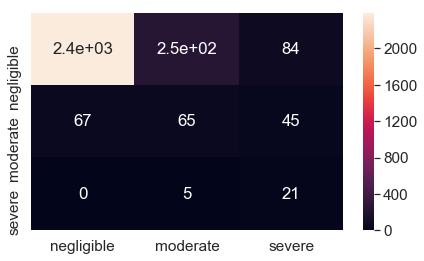

In [29]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array_to_plot = array
df_cm = pd.DataFrame(array_to_plot, index = ['negligible','moderate','severe'], columns = ['negligible','moderate','severe'])
plt.figure(figsize = (7,4))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True)

### List of models:
    1) Decision Tree - Sree
    2) SVM - Orion
    3) Logistic Regression - Orion
    4) K Nearest Neighbors - Zane
    5) Random Forest - Sree
    5) Neural Net? - Sree?
  